In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import numpy as np

In [2]:
page = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')
soup = BeautifulSoup(page.content, 'html.parser')
#soup.prettify()

In [3]:
companies = [col.get_text() for col in soup.find_all('td', class_ = 'Company')][1:]

origin = [col.get_text() for col in soup.find_all('td', class_ = 'Origin')][1:]

ref = [col.get_text() for col in soup.find_all('td', class_ = 'REF')][1:]

review_date = [col.get_text() for col in soup.find_all('td', class_ = 'ReviewDate')][1:]
clean_review_date = [int(date) for date in review_date]

cocoa_percent = [col.get_text() for col in soup.find_all('td', class_ = 'CocoaPercent')][1:]
clean_cocoa_percent = [float(p.replace('%', '')) for p in cocoa_percent]

location = [col.get_text() for col in soup.find_all('td', class_ = 'CompanyLocation')][1:]

rating = [col.get_text() for col in soup.find_all('td', class_ = 'Rating')][1:]
clean_rating = [float(r) for r in rating]

bean_type = [col.get_text() for col in soup.find_all('td', class_ = 'BeanType')][1:]

broad_origin = [col.get_text() for col in soup.find_all('td', class_ = 'BroadBeanOrigin')][1:]

In [4]:
data = {
    'Company': companies,
    'Specific Bean Origin or Bar Name': origin,
    'REF': ref,
    'Review Date': review_date,
    'Cocoa Percent': clean_cocoa_percent,
    'Company Location': location,
    'Rating': clean_rating,
    'Bean Type': bean_type,
    'Broad Bean Origin': broad_origin
}

In [11]:
df = pd.DataFrame(data)
df

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,,India


In [6]:
ratings_lst = df.Rating.values.tolist()
ratings_lst[:5]

[3.75, 2.75, 3.0, 3.5, 3.5]

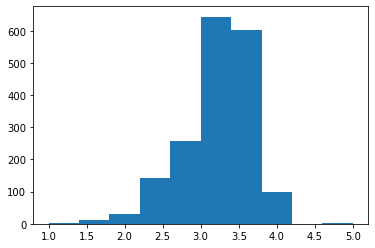

In [7]:
plt.hist(ratings_lst)
plt.savefig('rating_hist.png')

In [8]:
ten_best = df.groupby('Company').Rating.mean().nlargest(10)
ten_best

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64

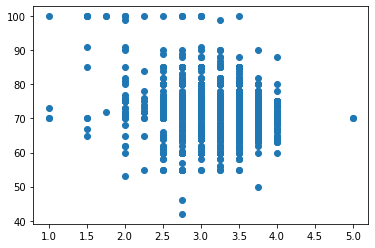

In [9]:
plt.scatter(df.Rating, df['Cocoa Percent'])

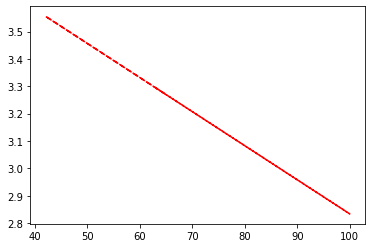

In [10]:
z = np.polyfit(df['Cocoa Percent'], df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df['Cocoa Percent'], line_function(df['Cocoa Percent']), "r--")
